In [2]:
from __future__ import division,print_function,unicode_literals

import os
import numpy as np

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

mpl.rc('axes',labelsize=14)
mpl.rc('xtick',labelsize=12)
mpl.rc('ytick',labelsize=12)

PROJECT_ROOT_DIR="."
CHAPTER_ID="fundamentals"

def save_fig(fig_id,tight_layout=True):
    path=os.path.join(PROJECT_ROOT_DIR,'images',CHAPTER_ID,fig_id+'.png')
    print('Saving figure',fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.save_fig(path,format='png',dpi=300)
    
import warnings
warnings.filterwarnings(action="ignore",message="internal gelsd")

In [18]:
# load data
import pandas as pd

datapath = os.path.join("datasets", "lifesat", "")
oecd_bli=pd.read_csv(datapath+"oecd_bli_2015.csv",thousands=",")
gdp_per_capita=pd.read_csv(datapath+"gdp_per_capita.csv",thousands=",",delimiter="\t",encoding="latin1",na_values="n/a")

# prepare the data
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]
    
country_stats=prepare_country_stats(oecd_bli,gdp_per_capita)
country_stats.head()

,GDP per capita,Life satisfaction
Country,,
Russia,9054.914,6.0
Turkey,9437.372,5.6
Hungary,12239.894,4.9
Poland,12495.334,5.8
Slovak Republic,15991.736,6.1


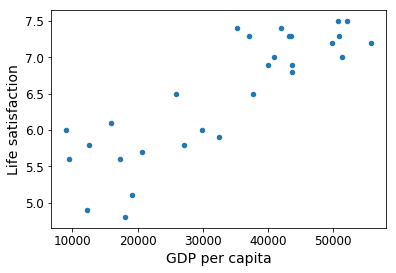

[[5.96242338]]


In [14]:
# 绘图
X=np.c_[country_stats["GDP per capita"]]
y=np.c_[country_stats["Life satisfaction"]]

country_stats.plot(kind="scatter",x="GDP per capita",y="Life satisfaction")
plt.show()

# 线性回归
from sklearn.linear_model import LinearRegression as LR
lin_reg_model=LR()

# 训练数据
lin_reg_model.fit(X,y)

# 预测
X_new=[[22587]]   # Cyprus's GDP capita
print(lin_reg_model.predict(X_new))

In [15]:
# knn
from sklearn.neighbors import KNeighborsRegressor as KNN

knn_reg_model=KNN(n_neighbors=3)
knn_reg_model.fit(X,y)
X_new=[[22587]]   # Cyprus's GDP capita
print(lin_reg_model.predict(X_new))

[[5.96242338]]


In [20]:
# 建立多种数据模型
oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',')
gdp_per_capita = pd.read_csv(datapath+"gdp_per_capita.csv", thousands=',', delimiter='\t',
                             encoding='latin1', na_values="n/a")
oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
gdp_per_capita.set_index("Country", inplace=True)
full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita, left_index=True, right_index=True)
full_country_stats.sort_values(by="GDP per capita", inplace=True)
full_country_stats.head()

,Air pollution,Assault rate,Consultation on rule-making,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Homicide rate,Household net adjusted disposable income,Household net financial wealth,...,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per capita,Estimates Start After
Country,,,,,,,,,,,,,,,,,,,,,
Brazil,18.0,7.9,4.0,6.7,45.0,10.41,67.0,25.5,11664.0,6844.0,...,14.97,79.0,72.0,16.3,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",8669.998,2014.0
Mexico,30.0,12.8,9.0,4.2,37.0,28.83,61.0,23.4,13085.0,9056.0,...,13.89,63.0,67.0,14.4,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",9009.280,2015.0
Russia,15.0,3.8,2.5,15.1,94.0,0.16,69.0,12.8,19292.0,3412.0,...,14.97,65.0,56.0,16.0,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",9054.914,2015.0
Turkey,35.0,5.0,5.5,12.7,34.0,40.86,50.0,1.2,14095.0,3251.0,...,13.42,88.0,62.0,16.4,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",9437.372,2013.0
Hungary,15.0,3.6,7.9,4.8,82.0,3.19,58.0,1.3,15442.0,13277.0,...,15.04,62.0,77.0,17.6,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",12239.894,2015.0


In [21]:
full_country_stats[["GDP per capita", 'Life satisfaction']].loc["United States"]

GDP per capita       55805.204
Life satisfaction        7.200
Name: United States, dtype: float64

In [27]:
# 拆分数据集，构造缺失数据和建模数据
remove_indices = [0, 1, 6, 8, 33, 34, 35]
keep_indices = list(set(range(36)) - set(remove_indices))

sample_data = full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]
missing_data = full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[remove_indices]

In [28]:
sample_data.loc[["Hungary","Korea","France","Australia","United States"]]

,GDP per capita,Life satisfaction
Country,,
Hungary,12239.894,4.9
Korea,27195.197,5.8
France,37675.006,6.5
Australia,50961.865,7.3
United States,55805.204,7.2


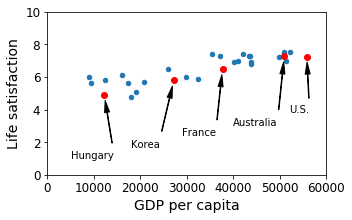

In [33]:
sample_data.plot(kind="scatter",x="GDP per capita", y='Life satisfaction',figsize=(5,3))
plt.axis([0,60000,0,10])

position_text = {
    "Hungary": (5000, 1),
    "Korea": (18000, 1.7),
    "France": (29000, 2.4),
    "Australia": (40000, 3.0),
    "United States": (52000, 3.8),
}
for country, pos_text in position_text.items():
    pos_data_x, pos_data_y = sample_data.loc[country]
    country = "U.S." if country == "United States" else country
    plt.annotate(country, xy=(pos_data_x, pos_data_y), xytext=pos_text,
            arrowprops=dict(facecolor='black', width=0.5,shrink=0.1, headwidth=5))
    plt.plot(pos_data_x, pos_data_y, "ro")
# save_fig('money_happy_scatterplot')
plt.show()

Text(5000, 8.2, '$\\theta_1 = -5 \\times 10^{-5}$')

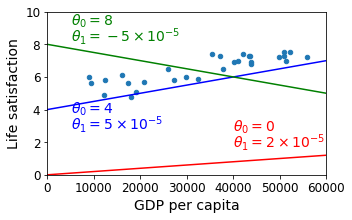

In [41]:
# 线性回归方程
sample_data.plot(kind="scatter",x="GDP per capita", y='Life satisfaction',figsize=(5,3))
plt.axis([0,60000,0,10])
x=np.linspace(0,60000,10000)
plt.plot(x,2*x/100000,color="r")
plt.text(40000,2.7,r"$\theta_0 = 0$",fontsize=14,color="r")
plt.text(40000,1.7,r"$\theta_1 = 2 \times 10^{-5}$",fontsize=14,color="r")

plt.plot(x,5*x/100000+4,color="b")
plt.text(5000,3.8,r"$\theta_0 = 4$",fontsize=14,color="b")
plt.text(5000,2.8,r"$\theta_1 = 5 \times 10^{-5}$",fontsize=14,color="b")

plt.plot(x,8-5*x/100000,color="g")
plt.text(5000,9.2,r"$\theta_0 = 8$",fontsize=14,color="g")
plt.text(5000,8.2,r"$\theta_1 = -5 \times 10^{-5}$",fontsize=14,color="g")

Text(5000, 2.7, '$\\theta_1 = 4.91 \\times 10^{-5}$')

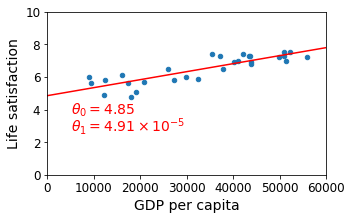

In [47]:
# 可能的线性模型
sample_data.plot(kind="scatter",x="GDP per capita", y='Life satisfaction',figsize=(5,3))
plt.axis([0,60000,0,10])
x=np.linspace(0,60000,10000)
t0, t1 = lin_reg_model.intercept_[0], lin_reg_model.coef_[0][0]
plt.plot(x,t1*x+t0,color="r")
plt.text(5000,3.7,r"$\theta_0 = 4.85$",fontsize=14,color="r")
plt.text(5000,2.7,r"$\theta_1 = 4.91 \times 10^{-5}$",fontsize=14,color="r")

In [ ]:
# 数据存在缺失的情况下不同的建模情况
